In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("/home/yashfirke/income-inequality-prediction-e2e/notebooks/data/Inequality Prediction Dataset.csv")

In [3]:
df.head()

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  \
0                       White   All other         Not in labor force   
1                       White   All other   Children or Armed Forces   
2                       Black   All other   Children or Armed Forces   
3   Asian or Pacific Islander   All other   Children or Armed Forces   
4                       White   All other         Not in labor force   

  unemployment_reason  employment_stat  wage_per_hour is_labor_union  \
0                 NaN                0              0            NaN   
1                 NaN                0              0            NaN   
2                 NaN                0            500             No   
3                 NaN                0              0            NaN   
4                 NaN                0              0            NaN   

   working_week_per_year  industry_code            industry_code_main  \
0                     52              0   Not in universe or children   
1                      0              0   Not in universe or children   
2                     15             41             Hospital services   
3                      0              0   Not in universe or children   
4                      0              0   Not in universe or children   

   occupation_code             occupation_code_main  total_employed  \
0                0                              NaN               2   
1                0                              NaN               0   
2               26   Adm support including clerical               4   
3                0                              NaN               0   
4                0                              NaN               0   

                             household_stat              household_summary  \
0                               Householder                    Householder   
1                     Nonfamily householder                    Householder   
2   Child 18+ never marr Not in a subfamily              Child 18 or older   
3     Child <18 never marr not in subfamily   Child under 18 never married   
4                     Spouse of householder          Spouse of householder   

         under_18_family veterans_admin_questionnaire  vet_benefit  \
0                    NaN                          NaN            2   
1                    NaN                          NaN            2   
2                    NaN                          NaN            2   
3   Both parents present                          NaN            0   
4                    NaN                          NaN            2   

           tax_status  gains  losses  stocks_status citizenship  mig_year  \
0   Head of household      0       0            292      Native        95   
1              Single      0       0              0      Native        94   
2              Single      0       0              0      Native        94   
3            Nonfiler      0       0              0      Native        94   
4      Joint both 65+      0       0              0      Native        95   

  country_of_birth_own country_of_birth_father country_of_birth_mother  \
0                   US                      U

In [4]:
df.tail()

ID  age   gender                    education  \
209494  ID_TZ99995   16   Female            7th and 8th grade   
209495  ID_TZ99996   78     Male   Bachelors degree(BA AB BS)   
209496  ID_TZ99997    8   Female                     Children   
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                    class education_institute  \
209494                NaN         High school   
209495                NaN                 NaN   
209496                NaN                 NaN   
209497            Private                 NaN   
209498   Local government         High school   

                          marital_status    race is_hispanic  \
209494                     Never married   White   All other   
209495   Married-civilian spouse present   White   All other   
209496                     Never married   White   All other   
209497   Married-civilian spouse present   White   All other   
209498                     Never married   Black   All other   

            employment_commitment unemployment_reason  employment_stat  \
209494         Not in labor force                 NaN                0   
209495         Not in labor force                 NaN                0   
209496   Children or Armed Forces                 NaN                0   
209497   Children or Armed Forces                 NaN                0   
209498   Children or Armed Forces          Re-entrant                0   

        wage_per_hour is_labor_union  working_week_per_year  industry_code  \
209494              0            NaN                      0              0   
209495              0            NaN                      0              0   
209496              0            NaN                      0              0   
209497            700             No                     52             32   
209498              0            NaN                      8             50   

                  industry_code_main  occupation_code  \
209494   Not in universe or children                0   
209495   Not in universe or children                0   
209496   Not in universe or children                0   
209497               Wholesale trade               42   
209498         Public administration               26   

                   occupation_code_main  total_employed  \
209494                              NaN               0   
209495                              NaN               0   
209496                              NaN               0   
209497     Handlers equip cleaners etc                4   
209498   Adm support including clerical               6   

                                  household_stat  \
209494     Child <18 never marr not in subfamily   
209495                               Householder   
209496     Child <18 never marr not in subfamily   
209497                     Spouse of householder   
209498   Child 18+ never marr Not in a subfamily   

                    household_summary        under_18_family  \
209494   Child under 18 never married   Both parents present   
209495                    Householder                    NaN   
209496   Child under 18 never married   Both parents present   
209497          Spouse of householder                    NaN   
209498              Child 18 or older                    NaN   

       veterans_admin_questionnaire  vet_benefit            tax_status  gains  \
209494                          NaN            2              Nonfiler      0   
209495                          NaN            2        Joint both 65+      0   
209496                          NaN            0              Nonfiler      0   
209497                          NaN            2   Joint both under 65      0   
209498                          NaN            2              Nonfiler      0   

        losses  stocks_status citizenship  mig_year country_of_birth_own  \
209494       0              0      Native        95                   US

In [5]:
df.dtypes

ID                                 object
age                                 int64
gender                             object
education                          object
class                              object
education_institute                object
marital_status                     object
race                               object
is_hispanic                        object
employment_commitment              object
unemployment_reason                object
employment_stat                     int64
wage_per_hour                       int64
is_labor_union                     object
working_week_per_year               int64
industry_code                       int64
industry_code_main                 object
occupation_code                     int64
occupation_code_main               object
total_employed                      int64
household_stat                     object
household_summary                  object
under_18_family                    object
veterans_admin_questionnaire      

In [6]:
df.shape

(209499, 43)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [8]:
df.describe().T

count         mean          std    min      25%  \
age                    209499.0    34.518728    22.306738   0.00    15.00   
employment_stat        209499.0     0.176760     0.555562   0.00     0.00   
wage_per_hour          209499.0    55.433487   276.757327   0.00     0.00   
working_week_per_year  209499.0    23.158850    24.397963   0.00     0.00   
industry_code          209499.0    15.332398    18.049655   0.00     0.00   
occupation_code        209499.0    11.321734    14.460839   0.00     0.00   
total_employed         209499.0     1.956067     2.365154   0.00     0.00   
vet_benefit            209499.0     1.515854     0.850853   0.00     2.00   
gains                  209499.0   435.926887  4696.359500   0.00     0.00   
losses                 209499.0    36.881737   270.383302   0.00     0.00   
stocks_status          209499.0   194.533420  1956.375501   0.00     0.00   
mig_year               209499.0    94.499745     0.500001  94.00    94.00   
importance_of_record   209499.0  1740.888324   995.559557  37.87  1061.29   

                           50%      75%      max  
age                      33.00    50.00     90.0  
employment_stat           0.00     0.00      2.0  
wage_per_hour             0.00     0.00   9999.0  
working_week_per_year     8.00    52.00     52.0  
industry_code             0.00    33.00     51.0  
occupation_code           0.00    26.00     46.0  
total_employed            1.00     4.00      6.0  
vet_benefit               2.00     2.00      2.0  
gains                     0.00     0.00  99999.0  
losses                    0.00     0.00   4608.0  
stocks_status             0.00     0.00  99999.0  
mig_year                 94.00    95.00     95.0  
importance_of_record   1617.04  2185.48  18656.3

# **Exploratory Data Analysis**

In [9]:
df.sample(5)

ID  age   gender                            education  \
161556   ID_TZ56415   43     Male           Bachelors degree(BA AB BS)   
195933   ID_TZ87667   42     Male   Associates degree-academic program   
82501   ID_TZ173423   38   Female                           11th grade   
76842   ID_TZ168325    0     Male                             Children   
204785   ID_TZ95714    3   Female                             Children   

                    class education_institute  marital_status    race  \
161556   Local government                 NaN   Never married   White   
195933            Private                 NaN        Divorced   White   
82501             Private                 NaN        Divorced   White   
76842                 NaN                 NaN   Never married   White   
204785                NaN                 NaN   Never married   White   

                       is_hispanic      employment_commitment  \
161556                   All other   Children or Armed Forces   
195933                   All other   Children or Armed Forces   
82501                    All other   Children or Armed Forces   
76842                    All other   Children or Armed Forces   
204785   Central or South American   Children or Armed Forces   

       unemployment_reason  employment_stat  wage_per_hour is_labor_union  \
161556                 NaN                0              0           Same   
195933                 NaN                0              0            NaN   
82501                  NaN                0            425             No   
76842                  NaN                0              0            NaN   
204785                 NaN                0              0            NaN   

        working_week_per_year  industry_code  \
161556                     52             44   
195933                     52             33   
82501                       8             39   
76842                       0              0   
204785                      0              0   

                          industry_code_main  occupation_code  \
161556                       Social services               12   
195933                          Retail trade               33   
82501    Personal services except private HH               31   
76842            Not in universe or children                0   
204785           Not in universe or children                0   

                        occupation_code_main  total_employed  \
161556                Professional specialty               5   
195933   Precision production craft & repair               3   
82501                          Other service               2   
76842                                    NaN               0   
204785                                   NaN               0   

                                household_stat              household_summary  \
161556                   Nonfamily householder                    Householder   
195933                   Nonfamily householder                    Householder   
82501                              Householder                    Householder   
76842    Child <18 never marr not in subfamily   Child under 18 never married   
204785   Child <18 never marr not in subfamily   Child under 18 never married   

              under_18_family veterans_admin_questionnaire  vet_benefit  \
161556                    NaN                          NaN            2   
195933                    NaN                          NaN            2   
82501                     NaN                          NaN            2   
76842    Both parents present                          NaN            0   
204785   Both parents present                          NaN            0   

       tax_status  gains  losses  stocks_status citizenship  mig_year  \
161556     Single      0       0              0      Native        94   
195933     Single      0       0              1      Native        94   
82501    Nonfiler      0       0              0      Nati

It can be seen that few of the last columns have '?' as their entry so we need to convert to NaN.

In [10]:
round(df.isnull().sum()/df.shape[0]*100).astype(str)+'%'#returns the percentage of missing values in each column

ID                                 0.0%
age                                0.0%
gender                             0.0%
education                          0.0%
class                             50.0%
education_institute               94.0%
marital_status                     0.0%
race                               0.0%
is_hispanic                        0.0%
employment_commitment              0.0%
unemployment_reason               97.0%
employment_stat                    0.0%
wage_per_hour                      0.0%
is_labor_union                    90.0%
working_week_per_year              0.0%
industry_code                      0.0%
industry_code_main                 0.0%
occupation_code                    0.0%
occupation_code_main              50.0%
total_employed                     0.0%
household_stat                     0.0%
household_summary                  0.0%
under_18_family                   72.0%
veterans_admin_questionnaire      99.0%
vet_benefit                        0.0%


In [11]:
df.replace('?',np.nan,inplace=True)

In [12]:
round(df.isnull().sum()/df.shape[0]*100).astype(str)+'%'

ID                                 0.0%
age                                0.0%
gender                             0.0%
education                          0.0%
class                             50.0%
education_institute               94.0%
marital_status                     0.0%
race                               0.0%
is_hispanic                        0.0%
employment_commitment              0.0%
unemployment_reason               97.0%
employment_stat                    0.0%
wage_per_hour                      0.0%
is_labor_union                    90.0%
working_week_per_year              0.0%
industry_code                      0.0%
industry_code_main                 0.0%
occupation_code                    0.0%
occupation_code_main              50.0%
total_employed                     0.0%
household_stat                     0.0%
household_summary                  0.0%
under_18_family                   72.0%
veterans_admin_questionnaire      99.0%
vet_benefit                        0.0%


In [13]:
df['income_above_limit'].value_counts()

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

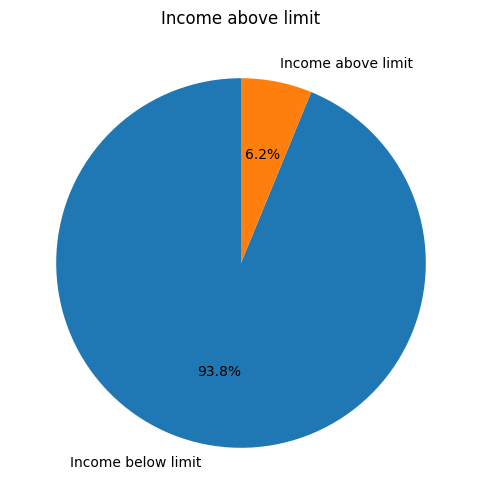

In [14]:
plt.figure(figsize=(10,6))
plt.pie(df['income_above_limit'].value_counts(),labels=['Income below limit','Income above limit'],autopct='%1.1f%%',startangle=90)
plt.title('Income above limit')
plt.show()

**Observations:**
* The dataset is unbalanced, as the dependent feature 'income_above_limit' contains 93.8% values have income less than limit and 6.2% values have income more than limit
* So many null values are also present which is not great

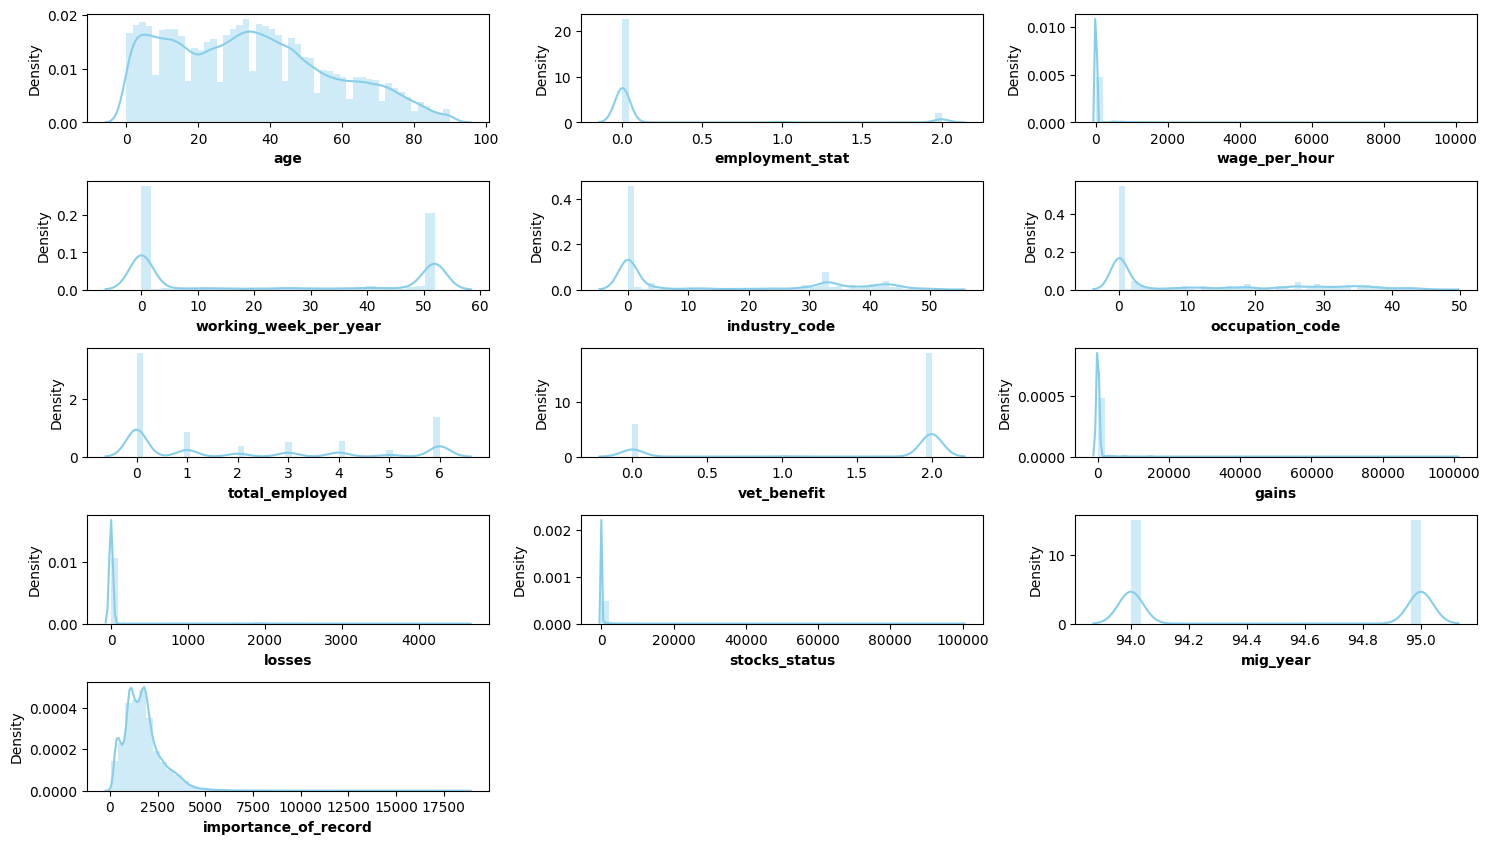

In [15]:
num_cols = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(num_cols):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='skyblue')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()


**Observations:**
*    Once more, the distribution of working hours per week highlights a significant peak at zero hours due to the considerable number of children.
*    A substantial portion of individuals have a low page count, specifically less than 2000.



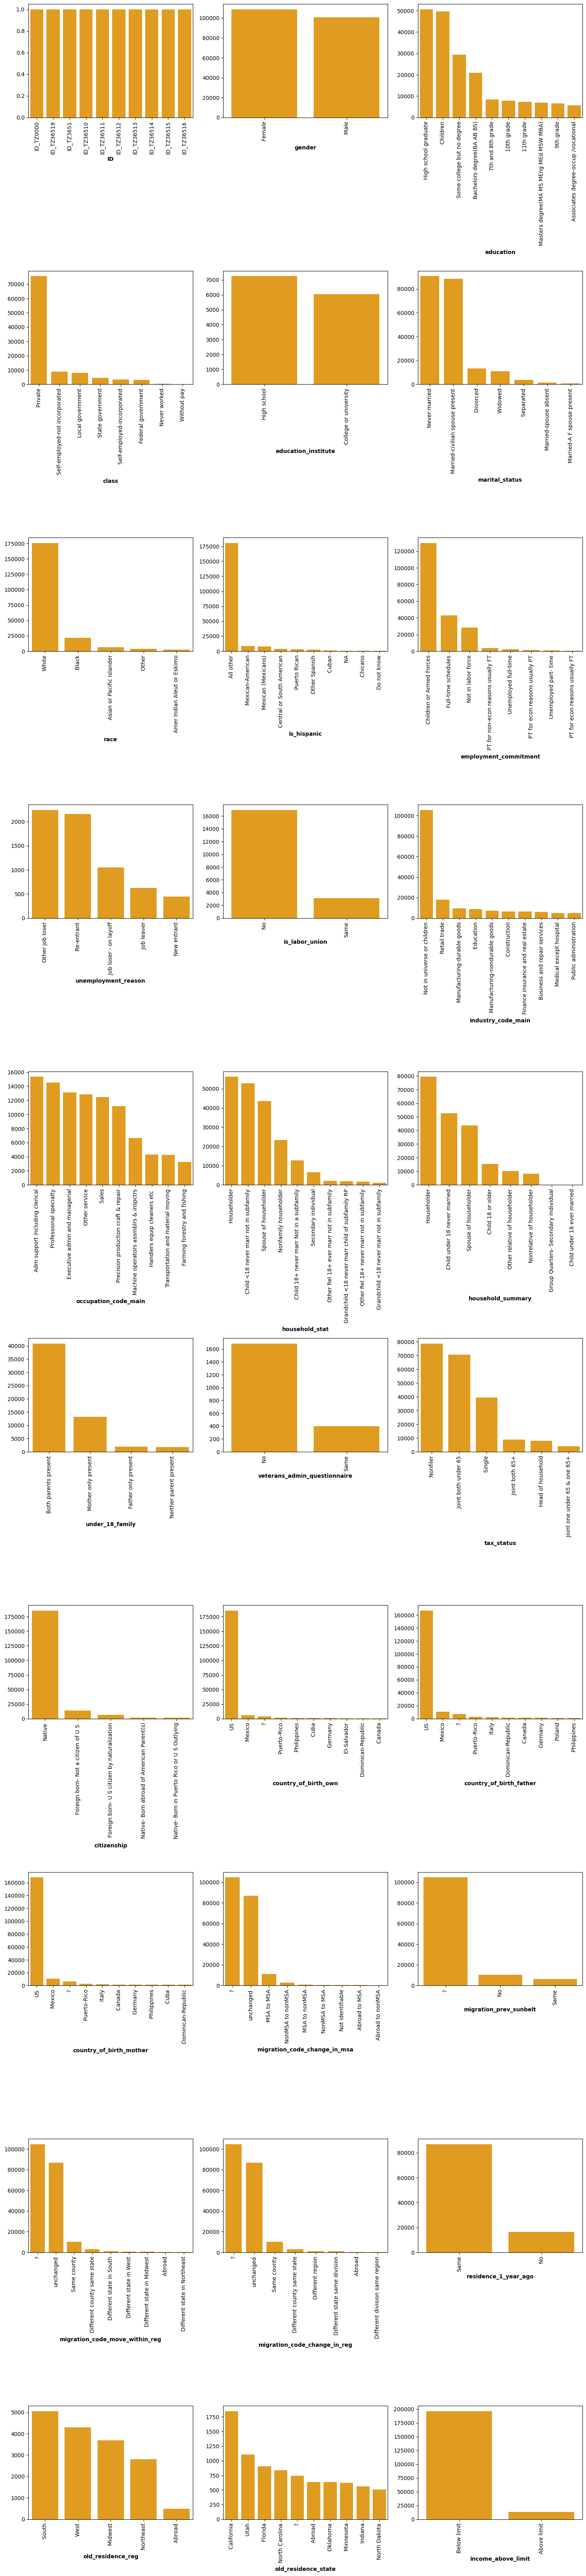

In [16]:
# Specify the number of top categories to display
top_n_categories = 10

# Find categorical columns with too many unique values
cat_cols = [feature for feature in df.columns if df[feature].dtype == 'O']

plt.figure(figsize=(15, 200))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 3, i+1)
    # Get the top N most frequent categories
    top_categories = df[col].value_counts().head(top_n_categories)
    sns.barplot(x=top_categories.index, y=top_categories.values, color='orange')
    plt.xlabel(col, weight='bold')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()

In [17]:
#checking duplies
df.duplicated().sum()

0

Checking for the Unique values in categorical columns and the count which will help us to model and encode in future

In [18]:
BOLD = '\033[1m'
RESET = '\033[0m'

for column in cat_cols:
    print(f"{BOLD}Unique Values of {column} are:{RESET}")
    print(f"{df[column].unique()}")
    print(f"{BOLD}No of unique values {df[column].nunique()}{RESET}")
    print("\n")
    print(f"{BOLD}-----------------------------------------------------------------------------------{RESET}")


Unique Values of ID are:
['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']
No of unique values 209499


-----------------------------------------------------------------------------------
Unique Values of gender are:
[' Female' ' Male']
No of unique values 2


-----------------------------------------------------------------------------------
Unique Values of education are:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']
No of unique values 17


-----------------------------------------------------------------------------------
Unique Values of class are:
[

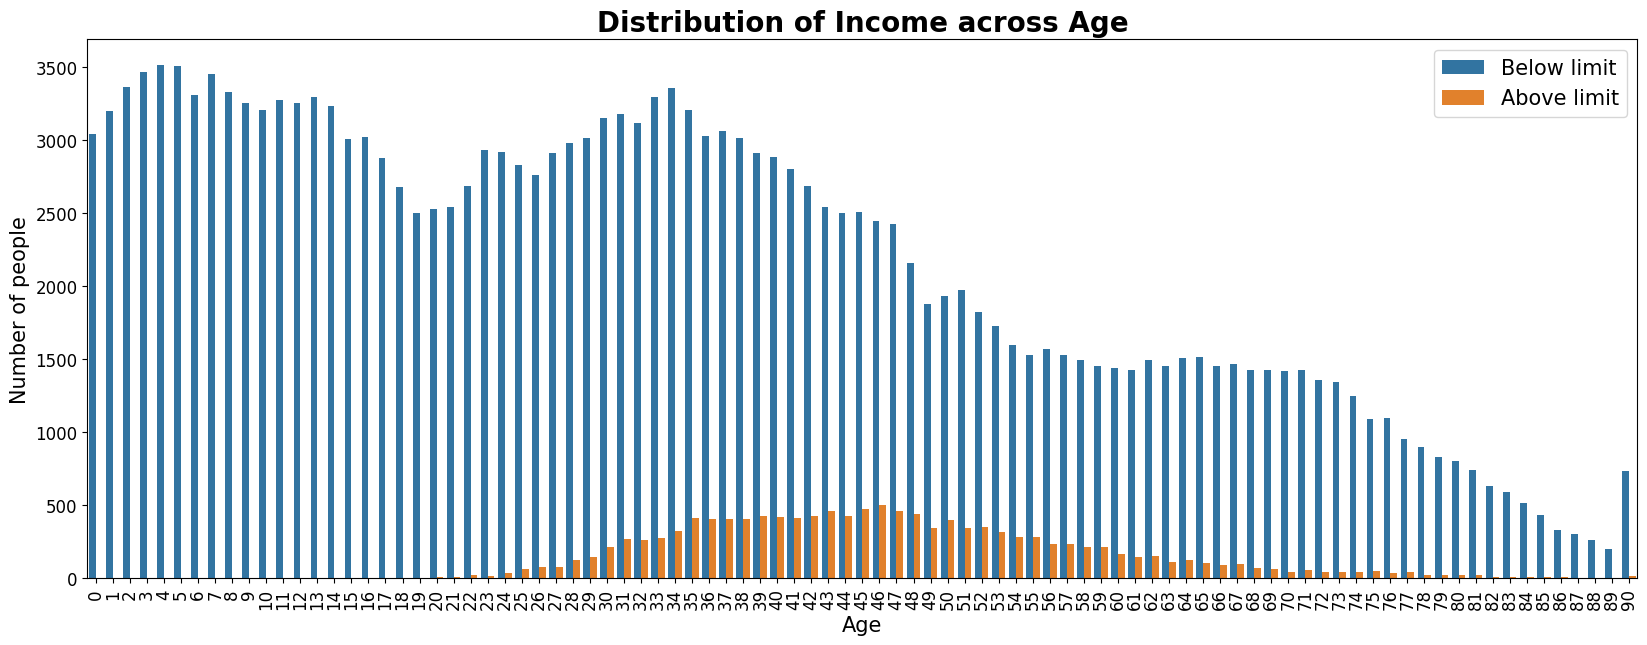

In [19]:
# Creating a countplot of income across age
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income_above_limit'])
plt.title('Distribution of Income across Age', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of people', fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()


In [20]:
# # Creating countplots for each categorical column
# for column in cat_cols:
#     plt.figure(figsize=(20, 7))
#     sns.countplot(x=df[column], hue=df['income_above_limit'], palette='rocket')
#     plt.title(f'Income across {column}')
#     plt.xlabel(column)
#     plt.ylabel('Number of people')
#     plt.tick_params(labelsize=12)
#     plt.legend(loc=1)
#     plt.show()

In [21]:
df.replace({'Below limit':0,'Above limit':1},inplace=True)

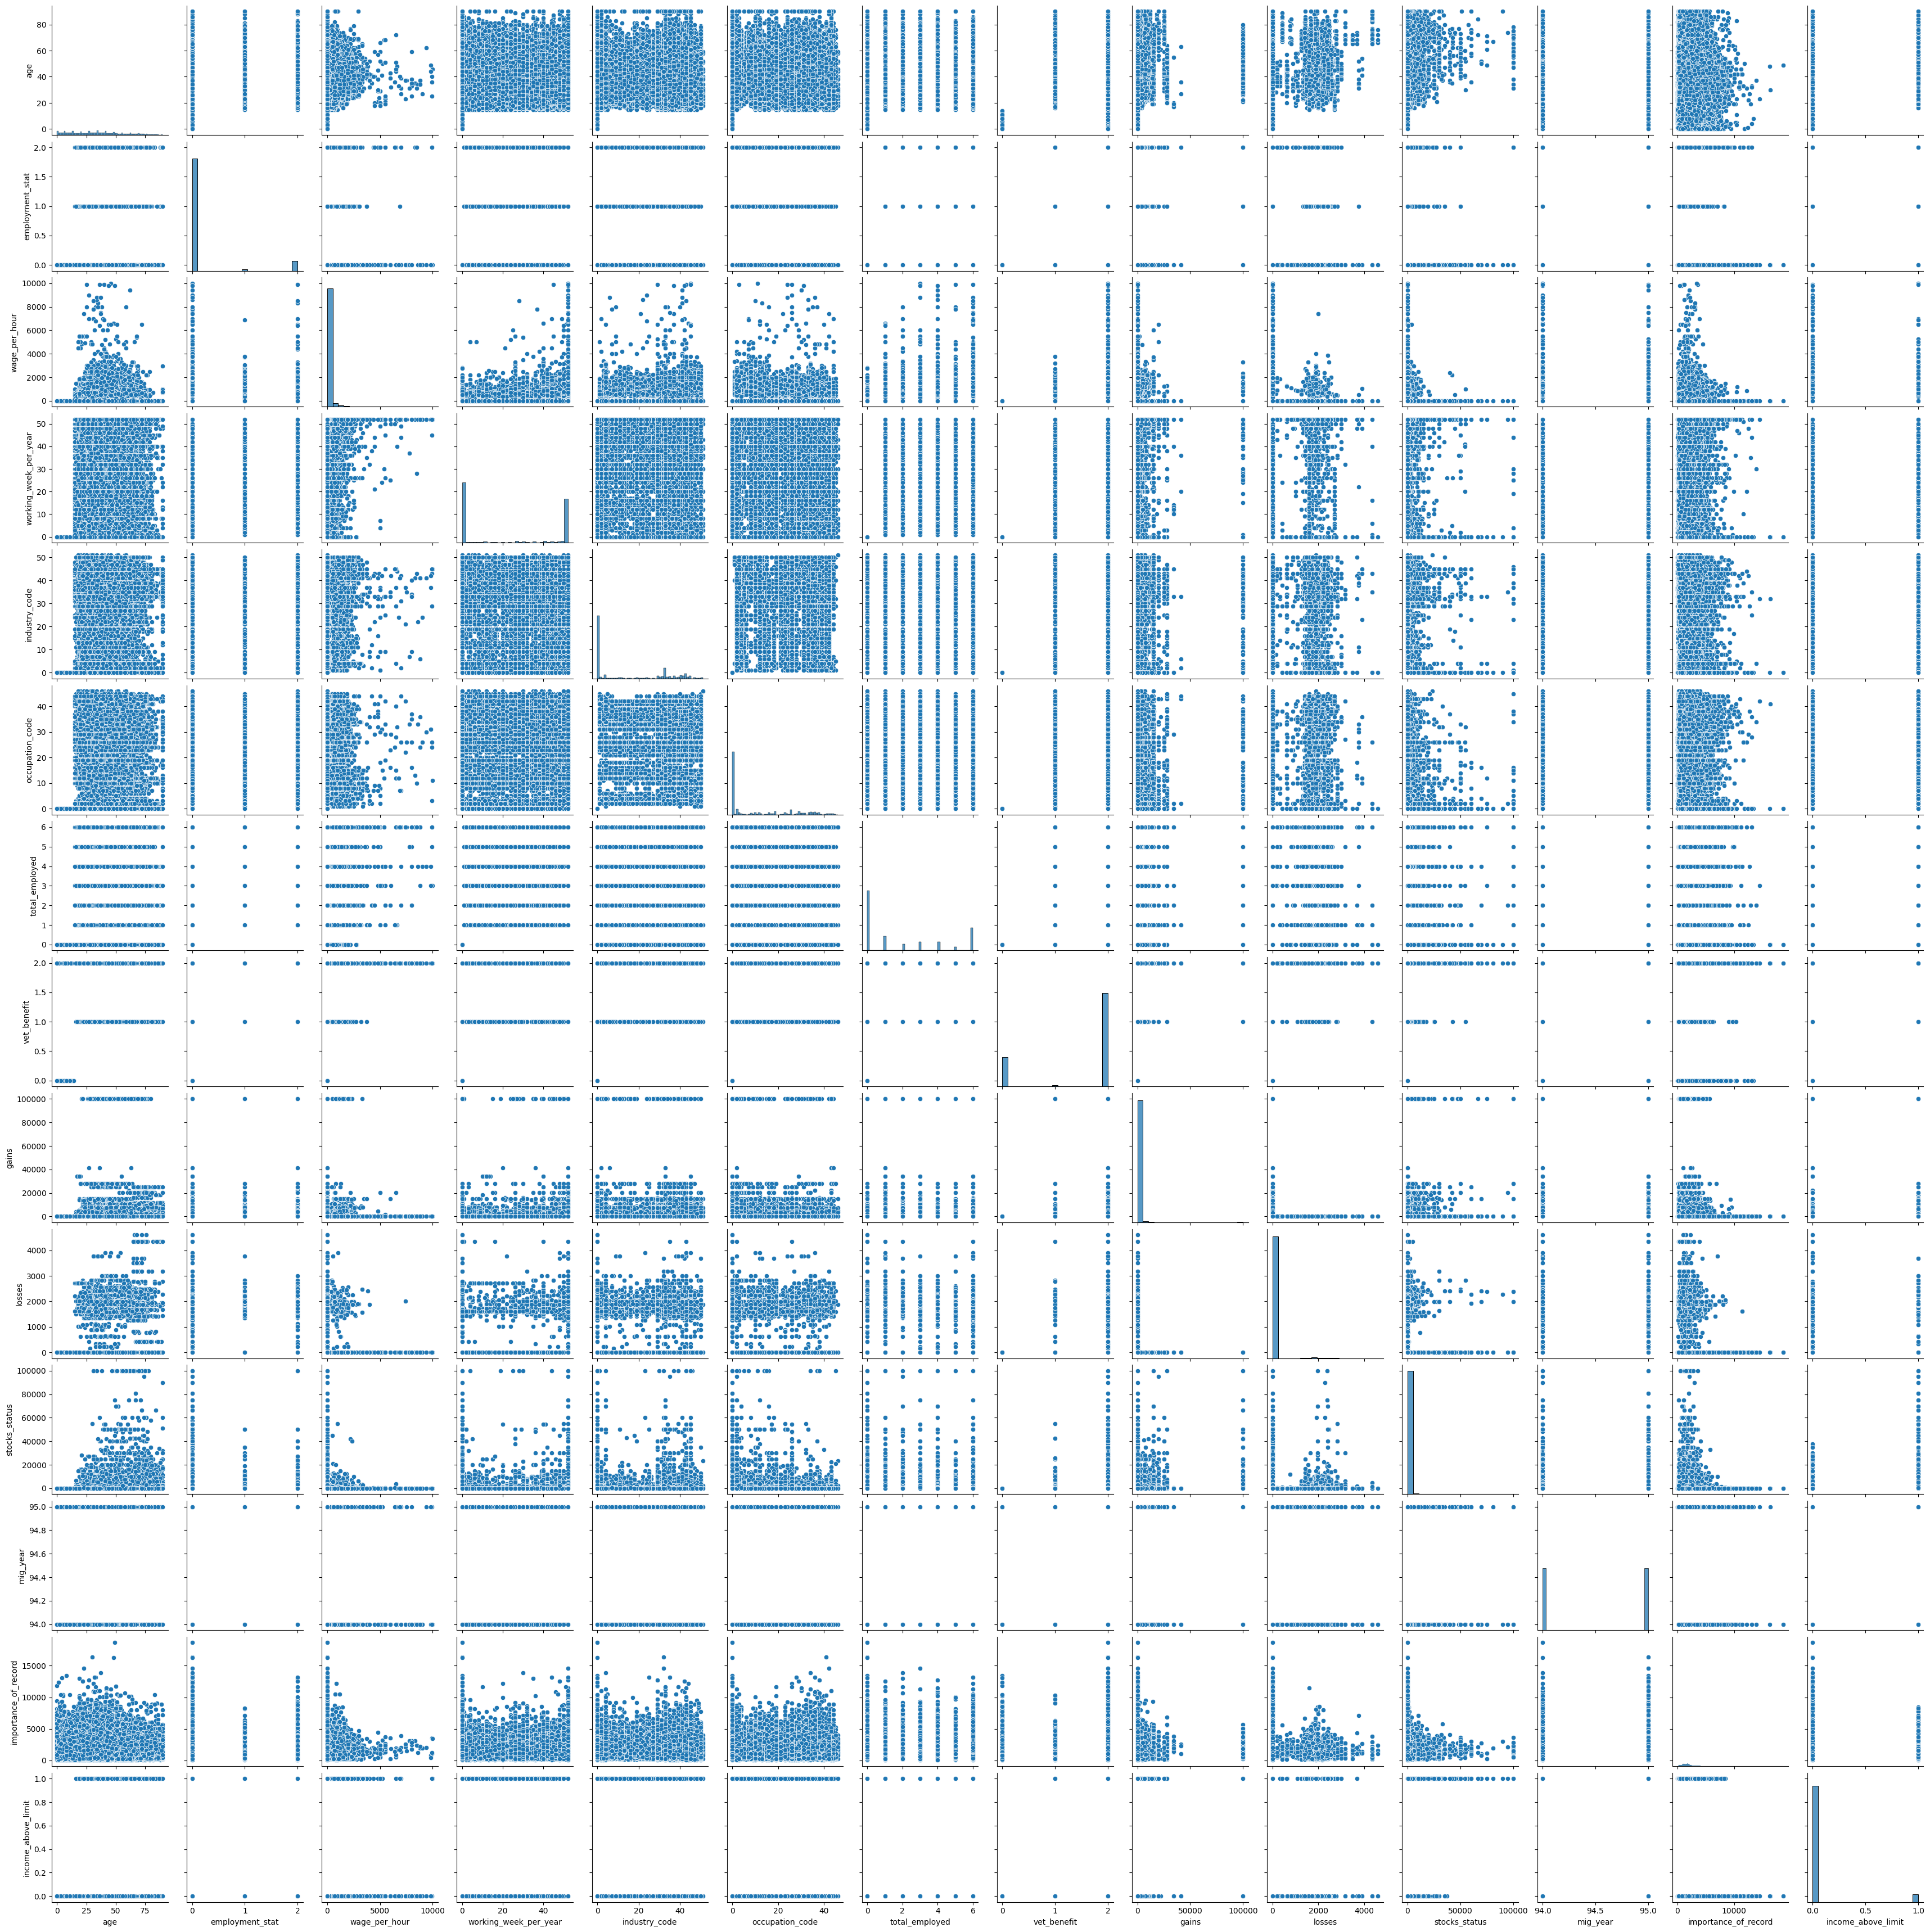

In [22]:
sns.pairplot(df)
plt.show()

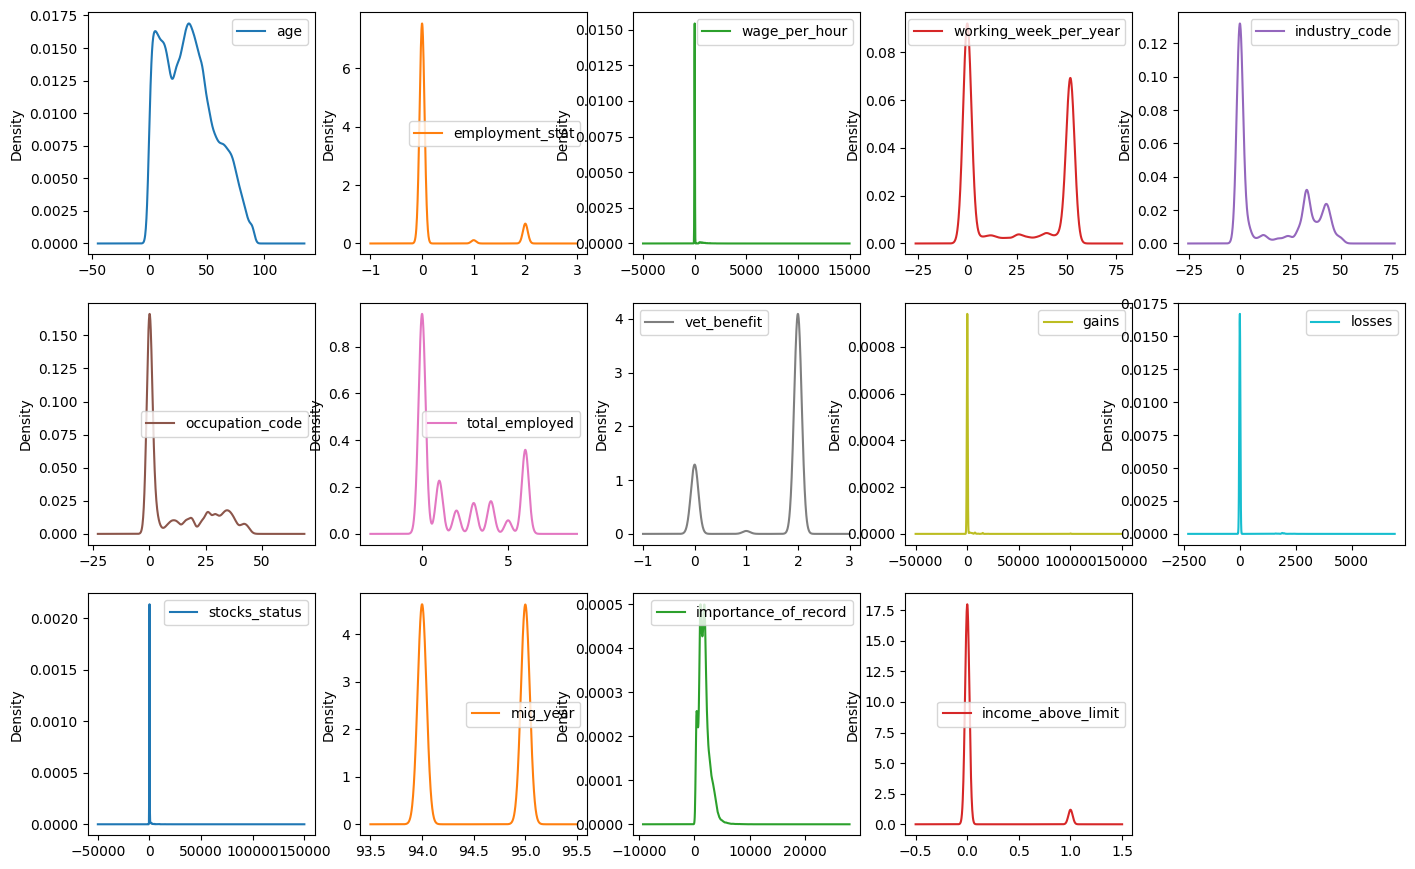

In [23]:
df.plot(kind="density", 
                subplots=True, 
                layout = (6,5), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

In [24]:
df.dtypes

ID                                 object
age                                 int64
gender                             object
education                          object
class                              object
education_institute                object
marital_status                     object
race                               object
is_hispanic                        object
employment_commitment              object
unemployment_reason                object
employment_stat                     int64
wage_per_hour                       int64
is_labor_union                     object
working_week_per_year               int64
industry_code                       int64
industry_code_main                 object
occupation_code                     int64
occupation_code_main               object
total_employed                      int64
household_stat                     object
household_summary                  object
under_18_family                    object
veterans_admin_questionnaire      

<Axes: >

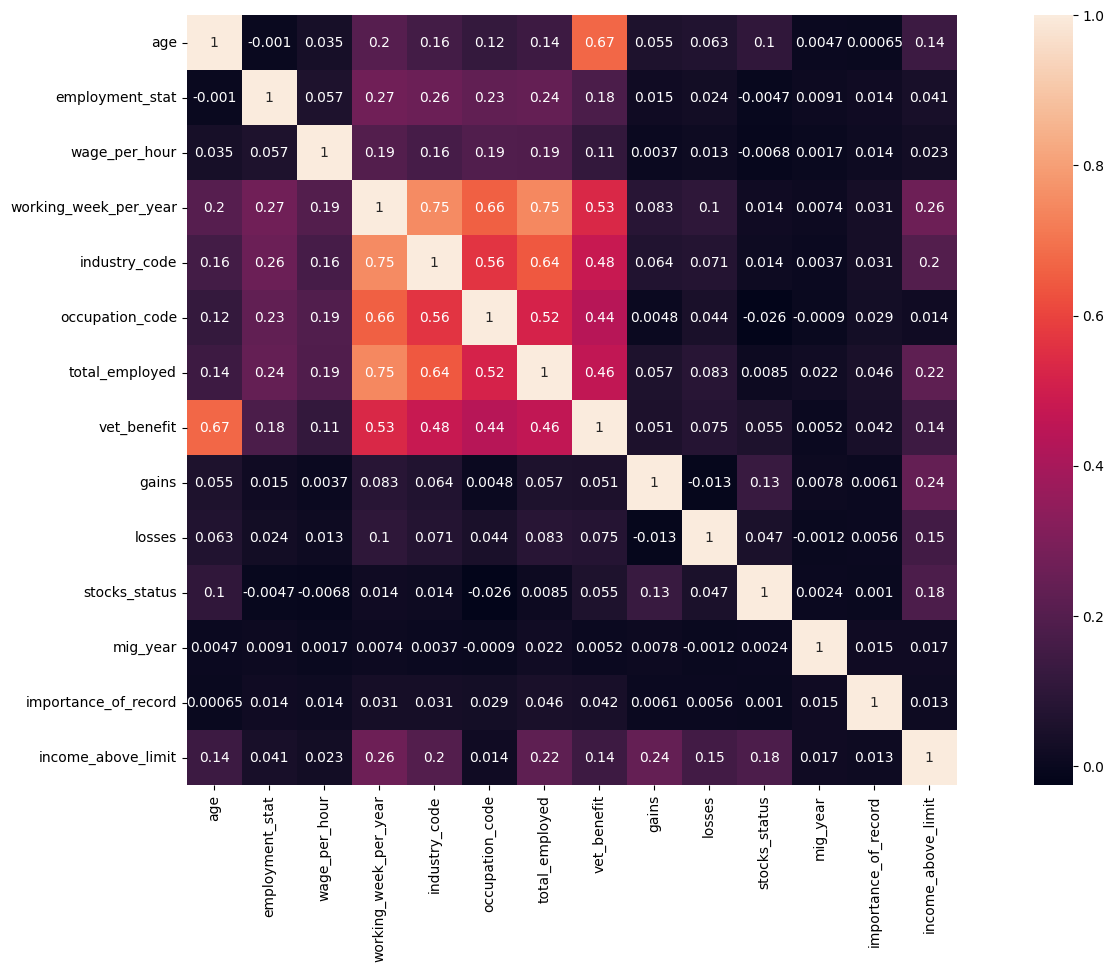

In [25]:
numeric_df = df.select_dtypes(include=[np.number]) # Select only numeric columns
corr = numeric_df.corr(method='pearson')
plt.figure(figsize=(20, 10))
sns.heatmap(corr, square=True,annot=True, )


# **Data Preprocessing**

In [26]:
df.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [27]:
# dropping columns with too much nan values i.e more than 50%
nan_cols_drop  = []
for cols in df.columns:
    if df[cols].isna().sum()/df.shape[0] >0.5:
        nan_cols_drop.append(cols)

In [28]:
print(f'We will drop the following columns from data: ')
print(nan_cols_drop)

We will drop the following columns from data: 
['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [29]:
df.drop(nan_cols_drop,axis=1,inplace=True)

In [30]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'total_employed',
       'household_stat', 'household_summary', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [31]:
df[["migration_code_change_in_msa","migration_prev_sunbelt","migration_code_move_within_reg","migration_code_change_in_reg"]].head(15)

migration_code_change_in_msa migration_prev_sunbelt  \
0                             ?                      ?   
1                     unchanged                    NaN   
2                     unchanged                    NaN   
3                     unchanged                    NaN   
4                             ?                      ?   
5                     unchanged                    NaN   
6                             ?                      ?   
7                             ?                      ?   
8                             ?                      ?   
9                             ?                      ?   
10                            ?                      ?   
11                    unchanged                    NaN   
12                            ?                      ?   
13                    unchanged                    NaN   
14                    unchanged                    NaN   

   migration_code_move_within_reg migration_code_change_in_reg  
0                               ?                            ?  
1                       unchanged                    unchanged  
2                       unchanged                    unchanged  
3                       unchanged                    unchanged  
4                               ?                            ?  
5                       unchanged                    unchanged  
6                               ?                            ?  
7                               ?                            ?  
8                               ?                            ?  
9                               ?                            ?  
10                              ?                            ?  
11                      unchanged                    unchanged  
12                              ?                            ?  
13                      unchanged                    unchanged  
14                      unchanged                    unchanged

We can see alot of '?' in the data which indicates missing values so its better to drop those columns.

In [32]:
drop_cols = ["migration_code_change_in_msa","migration_prev_sunbelt","migration_code_move_within_reg","migration_code_change_in_reg"]
df.drop(drop_cols,axis=1,inplace=True)

In [33]:
df.shape

(209499, 29)

In [34]:
df.isna().sum()

ID                         0
age                        0
gender                     0
education                  0
marital_status             0
race                       0
is_hispanic                0
employment_commitment      0
employment_stat            0
wage_per_hour              0
working_week_per_year      0
industry_code              0
industry_code_main         0
occupation_code            0
total_employed             0
household_stat             0
household_summary          0
vet_benefit                0
tax_status                 0
gains                      0
losses                     0
stocks_status              0
citizenship                0
mig_year                   0
country_of_birth_own       0
country_of_birth_father    0
country_of_birth_mother    0
importance_of_record       0
income_above_limit         0
dtype: int64

The columns "Country of birth own," "father," and "mother" are not expected to have any impact on the model.

In [35]:
df = df.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1)

In [36]:
df.isna().sum()

ID                       0
age                      0
gender                   0
education                0
marital_status           0
race                     0
is_hispanic              0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code            0
industry_code_main       0
occupation_code          0
total_employed           0
household_stat           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
importance_of_record     0
income_above_limit       0
dtype: int64

All missing values handled successfully

In [37]:
df.drop(columns=['household_stat'],axis=1,inplace=True)

In [38]:
df.drop(columns= "ID",axis=1,inplace=True)

According to our previous analysis on columns and their unique values, this column is useless hence drop it.

### **Outlier Detection**

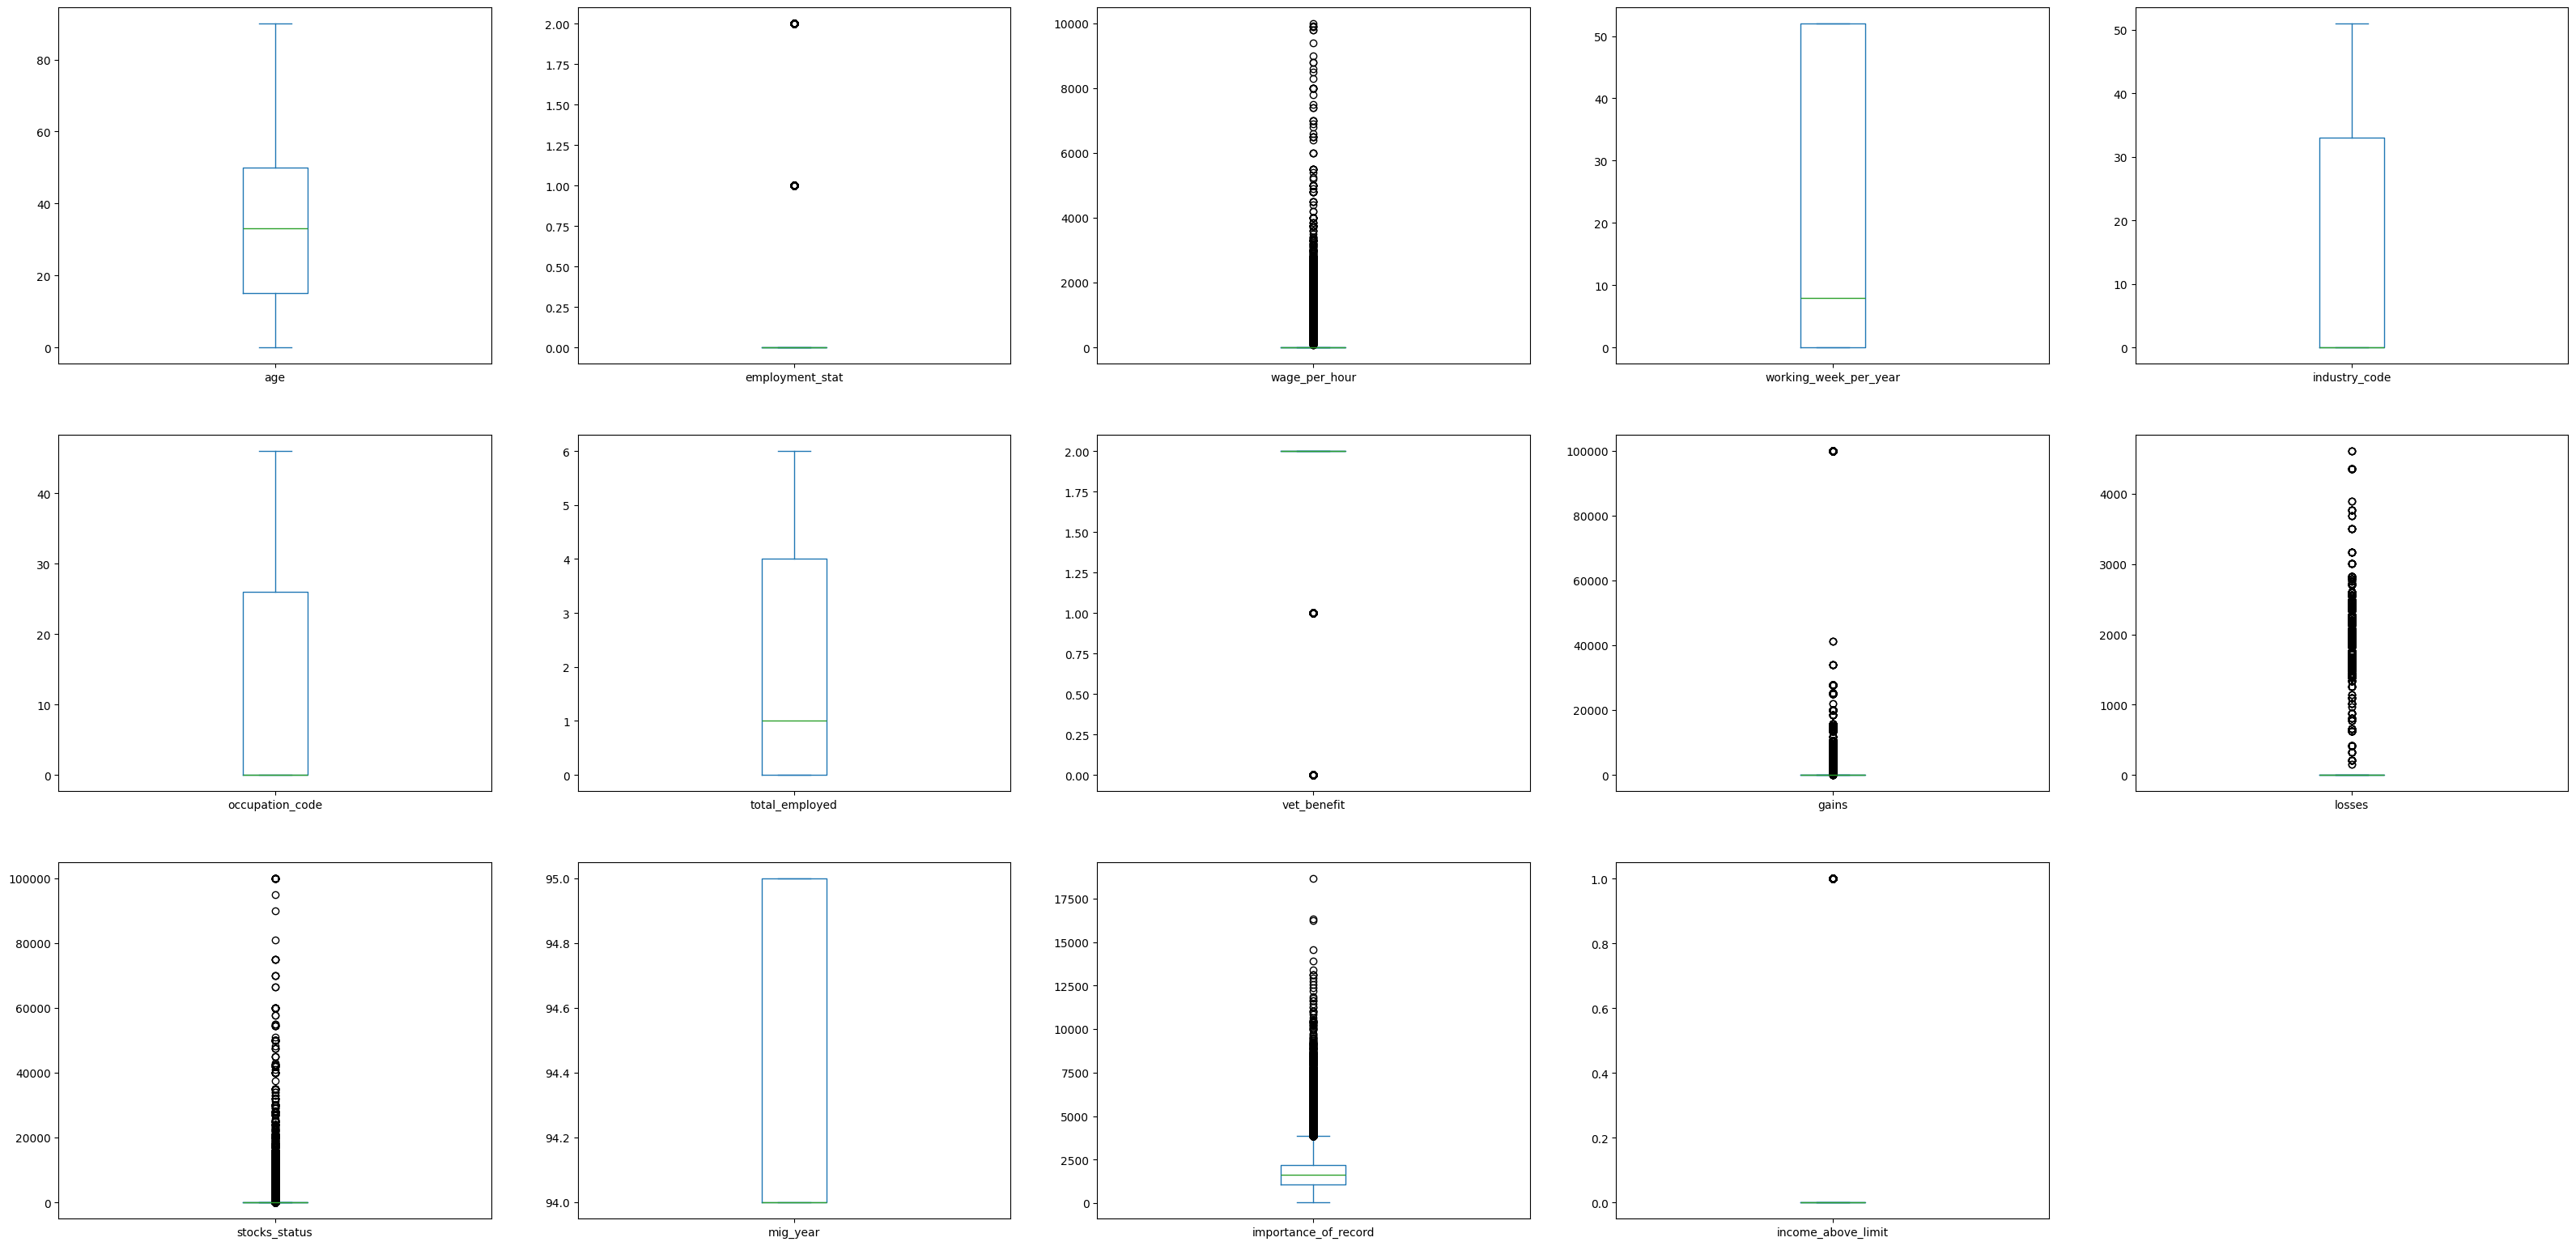

In [39]:
df.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,5), 
                figsize=(40,40), 
                sharex=False, 
                sharey=False);

We can see not many outliers so its better to retain the info than dropping the rows.


### **Checking and fixing data imbalance**

In [40]:
df['income_above_limit'].value_counts()

income_above_limit
0    196501
1     12998
Name: count, dtype: int64

We can see there is imbalance of class, the mapping is as follows-

0: Below limit

1: Above limit

Downsampling will result in huge data loss so we will apply SMOTE() for upsampling

# NICHE SE FIX KARO 

In [42]:
X,y = df.drop(['income_above_limit'],axis=1),df['income_above_limit']

In [43]:
numeric_features = X.select_dtypes(exclude="object").columns

categorical_features = X.select_dtypes(include="object").columns

print(numeric_features)
print(categorical_features)

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')
Index(['gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'industry_code_main', 'household_summary',
       'tax_status', 'citizenship'],
      dtype='object')


In [44]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("num", num_pipeline, numeric_features),
    ("cat", cat_pipeline, categorical_features)
], remainder="passthrough")

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Scaling Before fixing data imbalance**

In [46]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [47]:
X_train.head()

age   gender                    education  marital_status    race  \
0    1     Male                     Children   Never married   White   
1    9     Male                     Children   Never married   White   
2   20   Female   Some college but no degree   Never married   Black   
3   80   Female            7th and 8th grade         Widowed   White   
4   23     Male   Some college but no degree   Never married   White   

     is_hispanic      employment_commitment  employment_stat  wage_per_hour  \
0      All other   Children or Armed Forces                0              0   
1      All other   Children or Armed Forces                0              0   
2   Puerto Rican   Children or Armed Forces                0              0   
3      All other         Not in labor force                0              0   
4      All other         Not in labor force                0              0   

   working_week_per_year  industry_code            industry_code_main  \
0                      0              0   Not in universe or children   
1                      0              0   Not in universe or children   
2                      0              0   Not in universe or children   
3                      0              0   Not in universe or children   
4                     30             33                  Retail trade   

   occupation_code  total_employed               household_summary  \
0                0               0   Other relative of householder   
1                0               0    Child under 18 never married   
2                0               0                     Householder   
3                0               0   Other relative of householder   
4               19               1               Child 18 or older   

   vet_benefit tax_status  gains  losses  stocks_status  \
0            0   Nonfiler      0       0              0   
1            0   Nonfiler      0       0              0   
2            2   Nonfiler      0       0              0   
3            2   Nonfiler      0       0              0   
4            2     Single      0       0              0   

                                    citizenship  mig_year  \
0                                        Native        95   
1                                        Native        95   
2   Native- Born in Puerto Rico or U S Outlying        94   
3                                        Native        95   
4                                        Native        95   

   importance_of_record  
0               1344.28  
1               2382.52  
2                968.10  
3               1235.87  
4               1560.01

In [48]:
X_test.head()

age   gender              education                    marital_status  \
0    3     Male               Children                     Never married   
1   12   Female               Children                     Never married   
2    8   Female               Children                     Never married   
3   28     Male   High school graduate                     Never married   
4   69   Female             10th grade   Married-civilian spouse present   

     race        is_hispanic      employment_commitment  employment_stat  \
0   White   Mexican-American   Children or Armed Forces                0   
1   Black          All other   Children or Armed Forces                0   
2   White          All other   Children or Armed Forces                0   
3   White   Mexican-American        Full-time schedules                0   
4   White                 NA   Children or Armed Forces                0   

   wage_per_hour  working_week_per_year  industry_code  \
0              0                      0              0   
1              0                      0              0   
2              0                      0              0   
3              0                     52             33   
4              0                      0              0   

             industry_code_main  occupation_code  total_employed  \
0   Not in universe or children                0               0   
1   Not in universe or children                0               0   
2   Not in universe or children                0               0   
3                  Retail trade               19               1   
4   Not in universe or children                0               0   

                household_summary  vet_benefit tax_status  gains  losses  \
0    Child under 18 never married            0   Nonfiler      0       0   
1    Child under 18 never married            0   Nonfiler      0       0   
2   Other relative of householder            0   Nonfiler      0       0   
3               Child 18 or older            2     Single      0       0   
4           Spouse of householder            2   Nonfiler      0       0   

   stocks_status                                 citizenship  mig_year  \
0              0                                      Native        95   
1              0                                      Native        94   
2              0                                      Native        95   
3              0   Native- Born abroad of American Parent(s)        95   
4              0                                      Native        94   

   importance_of_record  
0               1647.70  
1               2268.72  
2               1998.42  
3               1826.06  
4               2006.89

In [52]:
X_train_transformed = transformer.fit_transform(X_train)
# Transform testing data
X_test_transformed = transformer.transform(X_test)


In [57]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Count the class distribution before upsampling
print("Before SMOTE:")
print(Counter(y_train))

# Apply SMOTE for upsampling
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Count the class distribution after upsampling
print("After SMOTE:")
print(Counter(y_train_resampled))

# Print the shape of the upsampled data
print("Upsampled data shape:", X_train_resampled.shape, y_train_resampled.shape)


Before SMOTE:
Counter({0: 157223, 1: 10376})
After SMOTE:
Counter({0: 157223, 1: 157223})
Upsampled data shape: (314446, 105) (314446,)


# **Model Building**

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')

    return accuracy, precision, recall, f1


In [66]:
X_train_resampled.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [64]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models = {
    "XGBoost Classifier": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy, precision, recall, f1 = evaluate_classification_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(f1))
    accuracy_list.append(accuracy)

    print('='*35)
    print('\n')

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:gender: object, education: object, marital_status: object, race: object, is_hispanic: object, employment_commitment: object, industry_code_main: object, household_summary: object, tax_status: object, citizenship: object

In [ ]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)